In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate, train_test_split, cross_val_score
import joblib
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm
from statsmodels.formula.api import ols, quantreg, wls

pd.set_option('display.max_columns', None) 


In [2]:
# each team has $81.5 million in cap space for this season
# with 23 players allowed on the active roster, possible avg of about $3.5 million per player

In [3]:
# in final report, include:
# shoootout stuff and associated pay
# oiSV% for D
# 

In [4]:
# 'Need to feature select because a lot of colinearity between variables'
# ---- having redundant features in our regression models will lead to poorly fitting and unstable models

# Load in Models

In [3]:
#this skater model does not have contract length in it
skater_model = joblib.load('../Models/skater_model.pkl')
skater2= joblib.load('../Models/skater_model2.pkl')

goalie_model = joblib.load('../Models/goalie_model2.pkl')

C:\Users\essmar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 0.24.2 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\essmar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 0.24.2 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\essmar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator Pipeline from versi

# Load in Data

In [4]:
skaters= pd.read_csv('../Data/skaters_final.csv')

goalies= pd.read_csv('../Data/goalies_final.csv')
goalies= goalies.drop(columns='Unnamed: 0')

In [5]:
all_stats= pd.read_csv('../Data/stats_only.csv')
all_stats= all_stats.drop(columns='Unnamed: 0')

# Run on Test Set, Compare ypred with ytrue

## Skaters

In [64]:
s_df= skaters[['CF', 'PTS', 'HIT', 'TK', 'oiSV_Pct', 'ATOI', 'AGE', 'Season', 'PPG','PS','AAV']]

X= s_df.iloc[:,0:-1]
y= s_df.iloc[:, -1]

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=12)

In [65]:
np.mean(y)

2292056.094920282

In [69]:
y_pred= skater_model.predict(X_test)

In [71]:
np.mean(y_pred)

2323736.2284837323

In [72]:
np.min(y_pred)

550000.0

In [73]:
r2_score(y_test, y_pred)

0.7640197827353615

In [74]:
mean_absolute_error(y_test, y_pred)

606803.8914403984

In [75]:
mean_absolute_percentage_error(y_test, y_pred)

0.39807736865072957

In [ ]:
##########################################################################################

In [6]:
X= skaters.iloc[:,1:-2]
y= skaters.iloc[:, -1]

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=12)

In [7]:
y_pred= skater2.predict(X_test)

In [8]:
r2_score(y_test, y_pred)

0.7877405994184042

In [9]:
mean_absolute_error(y_test, y_pred)

578202.9857509249

In [10]:
mean_absolute_percentage_error(y_test, y_pred)

0.3793630098514984

C:\Users\essmar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


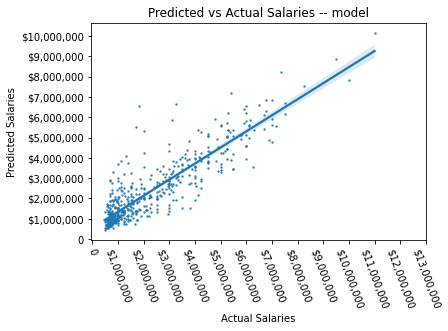

In [11]:
xticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000,12000000,13000000]
yticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000]
xtlabels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000','$10,000,000','$11,000,000','$12,000,000','$13,000,000']
ytlabels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000','$10,000,000']

sns.regplot(y_test, y_pred,scatter_kws={'s':2})
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.xticks(ticks= xticks, labels=xtlabels, rotation=290)
plt.yticks(ticks= yticks, labels=ytlabels, rotation=0)
plt.title('Predicted vs Actual Salaries -- model')
plt.show()

In [77]:
s= ols('AAV ~ CF + PTS + HIT + TK + oiSV_Pct + ATOI + AGE + Season + PPG + PS', s_df).fit()
print(s.summary())

                            OLS Regression Results                            
Dep. Variable:                    AAV   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     666.6
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:43:34   Log-Likelihood:                -41166.
No. Observations:                2697   AIC:                         8.235e+04
Df Residuals:                    2686   BIC:                         8.242e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.552e+08    1.2e+07    -12.981      0.0

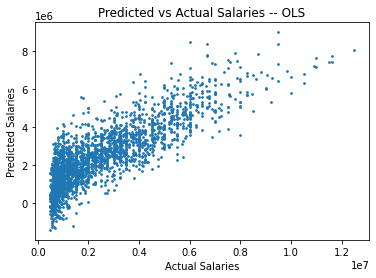

In [78]:
# yticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000,12000000]
# xticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000]
# ytlabels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000','$10,000,000','$11,000,000','$12,000,000']
# xtlabels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000','$10,000,000']

plt.scatter(y=s.fittedvalues, x=s_df['AAV'], s=3)
# plt.xticks(ticks= xticks, labels=xtlabels, rotation=290)
plt.ylabel("Predicted Salaries")
# plt.yticks(ticks= yticks, labels=ytlabels, rotation=0)
plt.xlabel("Actual Salaries")
plt.title('Predicted vs Actual Salaries -- OLS')


plt.show()

In [79]:
ols_df= skaters[['Player','GP','CF', 'PTS', 'HIT', 'TK', 'oiSV_Pct', 'ATOI', 'AGE', 'Season', 'PPG','PS','AAV']]

In [80]:
ols_df['Pred']= s.fittedvalues
ols_df['Pred']= abs(ols_df['Pred'])

C:\Users\essmar\AppData\Local\Temp/ipykernel_2916/2640037013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ols_df['Pred']= s.fittedvalues
C:\Users\essmar\AppData\Local\Temp/ipykernel_2916/2640037013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ols_df['Pred']= abs(ols_df['Pred'])


In [81]:
ols_df['Residuals']= ols_df['AAV'] - ols_df['Pred']

C:\Users\essmar\AppData\Local\Temp/ipykernel_2916/2370000713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ols_df['Residuals']= ols_df['AAV'] - ols_df['Pred']


In [82]:
ols_df.loc[(ols_df['Pred']<750000), 'Pred'] =750000 

C:\Users\essmar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [83]:
ols_df['MAPE']= mean_absolute_percentage_error(ols_df['AAV'],ols_df['Pred'])

C:\Users\essmar\AppData\Local\Temp/ipykernel_2916/3907431944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ols_df['MAPE']= mean_absolute_percentage_error(ols_df['AAV'],ols_df['Pred'])


In [84]:
ols_df.sort_values('Residuals')

,Player,GP,CF,PTS,HIT,TK,oiSV_Pct,ATOI,AGE,Season,PPG,PS,AAV,Pred,Residuals,MAPE
2369,Mike Cammalleri,73.000000,1077.500000,66.000000,19.500000,33.000000,90.950000,18.533333,28.0,2010,0.904110,8.150000,1700000.0,5.577571e+06,-3.877571e+06,0.447835
1745,Jarome Iginla,69.333333,1042.333333,62.000000,97.333333,36.666667,90.266667,20.116667,36.0,2013,0.894231,7.633333,1800000.0,5.553530e+06,-3.753530e+06,0.447835
2430,Anton Babchuk,72.000000,1080.000000,35.000000,22.000000,22.000000,92.700000,18.066667,26.0,2010,0.486111,7.900000,1400000.0,4.662146e+06,-3.262146e+06,0.447835
2514,Marc-Andre Bergeron,72.000000,921.000000,32.000000,30.000000,11.000000,92.600000,16.900000,28.0,2009,0.444444,7.400000,750000.0,3.969285e+06,-3.219285e+06,0.447835
842,Scott Hartnell,78.000000,963.000000,48.666667,128.333333,24.333333,90.266667,14.983333,35.0,2017,0.623932,5.900000,1000000.0,4.143746e+06,-3.143746e+06,0.447835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,Patrick Kane,66.000000,1083.666667,63.333333,15.333333,52.333333,90.700000,19.955556,26.0,2014,0.959596,7.700000,10500000.0,6.322577e+06,4.177423e+06,0.447835
733,Jack Eichel,71.000000,1043.500000,56.500000,34.500000,40.500000,91.050000,19.516667,21.0,2017,0.795775,6.450000,10000000.0,5.809929e+06,4.190071e+06,0.447835
398,Artemi Panarin,80.666667,1474.333333,81.000000,17.333333,52.666667,91.266667,19.816667,27.0,2019,1.004132,9.500000,11642857.0,7.415263e+06,4.227594e+06,0.447835
275,Thomas Chabot,44.666667,815.666667,26.666667,38.666667,19.333333,84.466667,16.316667,23.0,2019,0.597015,3.633333,8000000.0,3.571644e+06,4.428356e+06,0.447835


In [85]:
ols_df[ols_df['Residuals']<0]

,Player,GP,CF,PTS,HIT,TK,oiSV_Pct,ATOI,AGE,Season,PPG,PS,AAV,Pred,Residuals,MAPE
0,Wayne Simmonds,61.666667,670.666667,21.333333,115.333333,22.333333,91.733333,14.188889,32.0,2021,0.345946,1.166667,900000.0,1.801337e+06,-9.013366e+05,0.447835
1,Ryan Nugent-Hopkins,66.333333,893.000000,55.000000,42.666667,45.000000,90.600000,20.444444,28.0,2021,0.829146,5.433333,5125000.0,5.509506e+06,-3.845056e+05,0.447835
3,Blake Lizotte,35.666667,402.000000,11.000000,24.666667,9.666667,87.766667,12.622222,23.0,2021,0.308411,0.700000,800000.0,1.509057e+06,-7.090573e+05,0.447835
4,Matt Nieto,54.000000,570.666667,17.000000,37.333333,15.000000,91.466667,13.755556,28.0,2021,0.314815,1.066667,850000.0,1.533954e+06,-6.839541e+05,0.447835
5,Blake Comeau,61.000000,695.333333,16.000000,140.333333,27.000000,91.300000,15.466667,35.0,2021,0.262295,0.600000,1000000.0,1.471914e+06,-4.719140e+05,0.447835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,Tim Jackman,69.000000,558.000000,12.000000,151.000000,41.000000,91.100000,11.750000,27.0,2009,0.173913,-0.200000,550000.0,7.500000e+05,-4.231131e+04,0.447835
2689,Filip Kuba,71.000000,990.000000,40.000000,44.000000,36.000000,93.000000,23.283333,32.0,2009,0.563380,7.100000,3700000.0,4.764900e+06,-1.064900e+06,0.447835
2690,Tim Connolly,48.000000,606.000000,47.000000,17.000000,29.000000,92.000000,19.116667,27.0,2009,0.979167,5.700000,4500000.0,4.639875e+06,-1.398750e+05,0.447835
2691,Alexandre Burrows,82.000000,1016.000000,51.000000,67.000000,63.000000,91.100000,16.850000,27.0,2009,0.621951,6.600000,2000000.0,5.003065e+06,-3.003065e+06,0.447835


In [86]:
ols_df[ols_df['Residuals']>0]

,Player,GP,CF,PTS,HIT,TK,oiSV_Pct,ATOI,AGE,Season,PPG,PS,AAV,Pred,Residuals,MAPE
2,Trent Frederic,19.666667,150.666667,1.666667,29.000000,4.666667,91.233333,9.027778,23.0,2021,0.084746,-0.200000,1050000.0,7.500000e+05,5.535429e+05,0.447835
10,Ryan Lindgren,38.666667,499.333333,10.000000,67.666667,15.666667,88.033333,17.050000,23.0,2021,0.258621,2.266667,3000000.0,2.809164e+06,1.908357e+05,0.447835
14,Adam Lowry,59.666667,634.333333,19.000000,173.666667,29.666667,92.800000,15.044444,28.0,2021,0.318436,1.400000,3250000.0,2.575118e+06,6.748820e+05,0.447835
17,Alex Iafallo,69.000000,922.000000,35.333333,54.000000,19.666667,89.833333,18.550000,27.0,2021,0.512077,3.066667,4000000.0,3.252204e+06,7.477957e+05,0.447835
19,Tanner Pearson,66.666667,829.666667,30.000000,92.666667,27.000000,91.233333,15.877778,28.0,2021,0.450000,2.566667,3250000.0,2.965363e+06,2.846369e+05,0.447835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,Jeff Hamilton,15.000000,159.000000,6.000000,6.000000,6.000000,92.900000,12.950000,30.0,2009,0.400000,0.600000,475000.0,7.500000e+05,2.288354e+05,0.447835
2692,Andy McDonald,46.000000,604.000000,44.000000,24.000000,18.000000,86.500000,19.083333,31.0,2009,0.956522,4.400000,4700000.0,3.521318e+06,1.178682e+06,0.447835
2693,George Parros,74.000000,334.000000,10.000000,89.000000,6.000000,94.100000,6.266667,29.0,2009,0.135135,1.000000,875000.0,7.500000e+05,6.788470e+05,0.447835
2694,Henrik Zetterberg,77.000000,1241.000000,73.000000,54.000000,42.000000,90.900000,19.883333,28.0,2009,0.948052,8.100000,6083333.0,5.860277e+06,2.230560e+05,0.447835


In [87]:
min(s.fittedvalues)

-1390453.9621246452

In [88]:
len(s.fittedvalues[s.fittedvalues<0])

105

In [89]:
s.fittedvalues[(s.fittedvalues<2000000) & (s.fittedvalues>0)]

0       1.801337e+06
2       4.964571e+05
3       1.509057e+06
4       1.533954e+06
5       1.471914e+06
            ...     
2685    1.347431e+05
2686    5.923113e+05
2687    6.679453e+05
2688    2.461646e+05
2695    2.444718e+05
Length: 1223, dtype: float64

In [90]:
skaters.iloc[2692]

Player        Andy McDonald
Season                 2009
AGE                    31.0
Pos_C                     1
Pos_LW                    0
Pos_RW                    0
Pos_D                     0
GP                     46.0
G                      15.0
A                      29.0
PTS                    44.0
PPG                0.956522
PlusMinus             -13.0
ATOI              19.083333
TOI(EV)                14.7
PIM                    24.0
PS                      4.4
EV_A                    8.0
PP_A                    6.0
SH_A                    1.0
GW                      1.0
S                     128.0
S_Pct                  11.7
BLK                    18.0
HIT                    24.0
FOW                   213.0
FOL                   154.0
FO_Pct                 58.0
CF                    604.0
CA                    557.0
CF_Pct                 52.0
CF_Pct_rel              4.4
FF                    473.0
FA                    432.0
FF_Pct                 52.3
FF_Pct_rel          

In [91]:
mod= quantreg("AAV ~ CF + PTS + HIT + TK + oiSV_Pct + ATOI + AGE + Season + PPG + PS", s_df)
res = mod.fit(q=.99)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                    AAV   Pseudo R-squared:               0.6264
Model:                       QuantReg   Bandwidth:                   4.716e+05
Method:                 Least Squares   Sparsity:                    2.628e+07
Date:                Mon, 25 Oct 2021   No. Observations:                 2697
Time:                        17:43:39   Df Residuals:                     2686
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3146.2213   3.24e+07  -9.71e-05      1.000   -6.35e+07    6.35e+07
CF           225.9778    516.242      0.438      0.662    -786.294    1238.250
PTS        -1.488e+04   1.42e+04     -1.047      0.295   -4.27e+04     1.3e+04
HIT         2927.6331   1722.396      1.700      0.0

C:\Users\essmar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Text(0.5, 1.0, 'Predicted vs Actual Salaries -- quantreg')

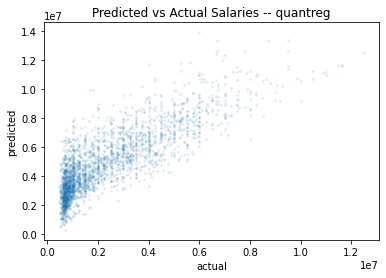

In [92]:
plt.scatter(y,res.fittedvalues, s=3, alpha=.1)
plt.ylabel('predicted')
plt.xlabel('actual')
plt.title('Predicted vs Actual Salaries -- quantreg')

In [93]:
len(res.fittedvalues[res.fittedvalues<0])

0

In [94]:
np.min(y_pred)

550000.0

In [95]:
np.min(res.fittedvalues)

268728.0914587225

In [96]:
len(res.fittedvalues)

2697

In [97]:
len(X)

2697

In [98]:
quant_df= skaters[['Player','GP','CF', 'PTS', 'HIT', 'TK', 'oiSV_Pct', 'ATOI', 'AGE', 'Season', 'PPG','PS','AAV']]
quant_df['Pred']= res.fittedvalues
quant_df['Residuals']= quant_df['AAV'] - quant_df['Pred']

quant_df.loc[(quant_df['Pred']<750000), 'Pred'] =750000 

quant_df

C:\Users\essmar\AppData\Local\Temp/ipykernel_2916/1094547132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quant_df['Pred']= res.fittedvalues
C:\Users\essmar\AppData\Local\Temp/ipykernel_2916/1094547132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quant_df['Residuals']= quant_df['AAV'] - quant_df['Pred']
C:\Users\essmar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Player,GP,CF,PTS,HIT,TK,oiSV_Pct,ATOI,AGE,Season,PPG,PS,AAV,Pred,Residuals
0,Wayne Simmonds,61.666667,670.666667,21.333333,115.333333,22.333333,91.733333,14.188889,32.0,2021,0.345946,1.166667,900000.0,4.003738e+06,-3.103738e+06
1,Ryan Nugent-Hopkins,66.333333,893.000000,55.000000,42.666667,45.000000,90.600000,20.444444,28.0,2021,0.829146,5.433333,5125000.0,8.864523e+06,-3.739523e+06
2,Trent Frederic,19.666667,150.666667,1.666667,29.000000,4.666667,91.233333,9.027778,23.0,2021,0.084746,-0.200000,1050000.0,1.433930e+06,-3.839296e+05
3,Blake Lizotte,35.666667,402.000000,11.000000,24.666667,9.666667,87.766667,12.622222,23.0,2021,0.308411,0.700000,800000.0,3.271855e+06,-2.471855e+06
4,Matt Nieto,54.000000,570.666667,17.000000,37.333333,15.000000,91.466667,13.755556,28.0,2021,0.314815,1.066667,850000.0,3.486458e+06,-2.636458e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,Andy McDonald,46.000000,604.000000,44.000000,24.000000,18.000000,86.500000,19.083333,31.0,2009,0.956522,4.400000,4700000.0,8.139463e+06,-3.439463e+06
2693,George Parros,74.000000,334.000000,10.000000,89.000000,6.000000,94.100000,6.266667,29.0,2009,0.135135,1.000000,875000.0,2.010457e+06,-1.135457e+06
2694,Henrik Zetterberg,77.000000,1241.000000,73.000000,54.000000,42.000000,90.900000,19.883333,28.0,2009,0.948052,8.100000,6083333.0,1.046727e+07,-4.383939e+06
2695,Brendan Shanahan,34.000000,308.000000,14.000000,18.000000,14.000000,93.300000,14.900000,39.0,2009,0.411765,1.100000,800000.0,3.605986e+06,-2.805986e+06


In [100]:
np.median(abs(quant_df['Residuals']))

2424255.807149359

C:\Users\essmar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


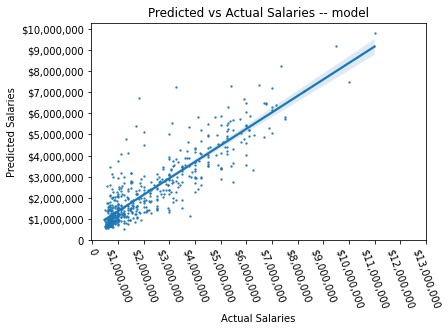

In [42]:
xticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000,12000000,13000000]
yticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000]
xtlabels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000','$10,000,000','$11,000,000','$12,000,000','$13,000,000']
ytlabels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000','$10,000,000']

sns.regplot(y_test, y_pred,scatter_kws={'s':2})
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.xticks(ticks= xticks, labels=xtlabels, rotation=290)
plt.yticks(ticks= yticks, labels=ytlabels, rotation=0)
plt.title('Predicted vs Actual Salaries -- model')
plt.show()

In [43]:
max(y_test)

11000000.0

In [44]:
max(y_pred)

9820166.650793651

In [46]:
min(y_test)

475000.0

In [47]:
min(y_pred)

550000.0

In [48]:
pred= skater_model.predict(X)

C:\Users\essmar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(


In [49]:
model_df= skaters[['Player','GP','CF', 'PTS', 'HIT', 'TK', 'oiSV_Pct', 'ATOI', 'AGE', 'Season', 'PPG','PS','AAV']]
model_df['Pred']= pred
model_df['Residuals']= model_df['AAV'] - model_df['Pred']

model_df.loc[(model_df['Pred']<750000), 'Pred'] =750000 

model_df

C:\Users\essmar\AppData\Local\Temp/ipykernel_2916/1265576268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Pred']= pred
C:\Users\essmar\AppData\Local\Temp/ipykernel_2916/1265576268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Residuals']= model_df['AAV'] - model_df['Pred']
C:\Users\essmar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,Player,GP,CF,PTS,HIT,TK,oiSV_Pct,ATOI,AGE,Season,PPG,PS,AAV,Pred,Residuals
0,Wayne Simmonds,61.666667,670.666667,21.333333,115.333333,22.333333,91.733333,14.188889,32.0,2021,0.345946,1.166667,900000.0,1.288042e+06,-388042.338624
1,Ryan Nugent-Hopkins,66.333333,893.000000,55.000000,42.666667,45.000000,90.600000,20.444444,28.0,2021,0.829146,5.433333,5125000.0,5.125992e+06,-992.063492
2,Trent Frederic,19.666667,150.666667,1.666667,29.000000,4.666667,91.233333,9.027778,23.0,2021,0.084746,-0.200000,1050000.0,1.050000e+06,0.000000
3,Blake Lizotte,35.666667,402.000000,11.000000,24.666667,9.666667,87.766667,12.622222,23.0,2021,0.308411,0.700000,800000.0,8.124185e+05,-12418.541286
4,Matt Nieto,54.000000,570.666667,17.000000,37.333333,15.000000,91.466667,13.755556,28.0,2021,0.314815,1.066667,850000.0,8.450066e+05,4993.386243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,Andy McDonald,46.000000,604.000000,44.000000,24.000000,18.000000,86.500000,19.083333,31.0,2009,0.956522,4.400000,4700000.0,4.700000e+06,0.000000
2693,George Parros,74.000000,334.000000,10.000000,89.000000,6.000000,94.100000,6.266667,29.0,2009,0.135135,1.000000,875000.0,8.711864e+05,3813.597884
2694,Henrik Zetterberg,77.000000,1241.000000,73.000000,54.000000,42.000000,90.900000,19.883333,28.0,2009,0.948052,8.100000,6083333.0,6.083333e+06,0.000000
2695,Brendan Shanahan,34.000000,308.000000,14.000000,18.000000,14.000000,93.300000,14.900000,39.0,2009,0.411765,1.100000,800000.0,8.122496e+05,-12249.559083


In [50]:
min(model_df.Residuals)

-4944896.507936508

In [51]:
len(model_df[abs(model_df['Residuals'])>1000000])

106

In [102]:
np.mean(abs(model_df['Residuals']))

128979.73076024094

In [103]:
np.median(abs(model_df['Residuals']))

5997.259637188283

In [104]:
model_df.sort_values('Residuals')

,Player,GP,CF,PTS,HIT,TK,oiSV_Pct,ATOI,AGE,Season,PPG,PS,AAV,Pred,Residuals
1745,Jarome Iginla,69.333333,1042.333333,62.000000,97.333333,36.666667,90.266667,20.116667,36.0,2013,0.894231,7.633333,1800000.0,6.744897e+06,-4.944897e+06
470,Eric Staal,81.666667,1240.000000,64.333333,41.666667,49.333333,90.300000,18.183333,34.0,2019,0.787755,7.633333,3250000.0,7.266497e+06,-4.016497e+06
2369,Mike Cammalleri,73.000000,1077.500000,66.000000,19.500000,33.000000,90.950000,18.533333,28.0,2010,0.904110,8.150000,1700000.0,5.421121e+06,-3.721121e+06
1421,Michael Del Zotto,63.333333,972.000000,26.000000,103.666667,17.666667,92.900000,20.933333,24.0,2014,0.410526,5.400000,1300000.0,4.797745e+06,-3.497745e+06
978,Jiri Hudler,75.000000,972.333333,58.666667,30.000000,31.666667,90.233333,17.544444,32.0,2016,0.782222,6.966667,2000000.0,5.094577e+06,-3.094577e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Tyler Myers,57.666667,930.666667,24.000000,59.000000,23.333333,92.900000,21.327778,29.0,2019,0.416185,4.400000,6000000.0,3.534061e+06,2.465939e+06
1176,Anze Kopitar,80.666667,1358.000000,69.333333,90.666667,40.666667,91.766667,20.377778,28.0,2016,0.859504,8.700000,10000000.0,7.479875e+06,2.520125e+06
2600,Francois Beauchemin,20.000000,320.000000,5.000000,26.000000,9.000000,90.400000,24.900000,29.0,2009,0.250000,1.100000,3800000.0,1.156052e+06,2.643948e+06
744,Bo Horvat,77.000000,853.000000,39.000000,67.666667,25.666667,90.100000,15.811111,22.0,2017,0.506494,3.700000,5500000.0,2.753397e+06,2.746603e+06


In [112]:
len(model_df[model_df['Residuals']<0])

1207

In [113]:
len(model_df[model_df['Residuals']>0])

951

In [114]:
len(model_df[model_df['Residuals']==0])

539

In [115]:
max(abs(model_df['Residuals']))

4944896.507936508

In [118]:
model_df[abs(model_df['Residuals'])==4944896.507936508]

,Player,GP,CF,PTS,HIT,TK,oiSV_Pct,ATOI,AGE,Season,PPG,PS,AAV,Pred,Residuals
1745,Jarome Iginla,69.333333,1042.333333,62.0,97.333333,36.666667,90.266667,20.116667,36.0,2013,0.894231,7.633333,1800000.0,6.744897e+06,-4.944897e+06


In [108]:
np.median(model_df[model_df['Residuals']<0]['Residuals'])

-10006.512413512333

In [109]:
np.mean(model_df[model_df['Residuals']<0]['Residuals'])

-166570.04318209813

In [110]:
np.median(model_df[model_df['Residuals']>0]['Residuals'])

10978.83597883489

In [111]:
np.mean(model_df[model_df['Residuals']>0]['Residuals'])

154372.54651900876

Capstone write-up idea:
- mention how predictions may not match actual values because this model's purpose is to determine a player's worth based off his play/stats, whereas in reality the financial situation regarding the player may actually be a lot more complex. For example:
        - player could willingly be taking a "hometown discount" to play somewhere he wants to be long-term or to keep the team togetjer
        - a team's salary cap situation may be incapable of retaining that salary (ie, point 1)
        - player is getting old/history of injury/decline in production makes signing him for more money less desirable
        - no winning pedigree could possibly be a deterrent/someone with stanley cups or extensive playoff experience could get more money despite having less stats
        - could be multiple players up for contract negotiations on the same team, so GM has to make them sign for less to keep the team together (point 1)
        - also depends on that particular year, specific team in question (cap space), and the free agency talent pool at the time
- salary cap constraints (in addition to a relatively small sample size -- esp goalies) is the biggest factor in limiting this models ability to yield reliable/concrete results because the GMs are limited in how much money they have to disperse
        - signing players to even $1 million more per year is much more impactful to a team's payrol than it would be for sports like football, basketball, baseball, or soccer (where there is no salary caps and players can make an obscene amount of money yearly)

- despite the pred vs test scatter plot, both have approximately the same mean salary


- rebuttal: salary cap is necessary to keep parity within the league since some teams have much more profitable markets (Toronto Maple Leafs vs Florida Panthers)

## Goalies

In [52]:
g_df= goalies[['GP','Season','W','GPS','GAA','SV_Pct','SOT_Pct','AGE','AAV']]

X= g_df.iloc[:,1:-1]
y= g_df.iloc[:, -1]

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=12)

In [53]:
y_pred= goalie_model.predict(X_test)

C:\Users\essmar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(


In [54]:
r2_score(y_test, y_pred)

0.30672359086838674

In [55]:
mean_absolute_error(y_test, y_pred)

937110.7028620742

In [56]:
g_df.shape

(281, 9)

C:\Users\essmar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


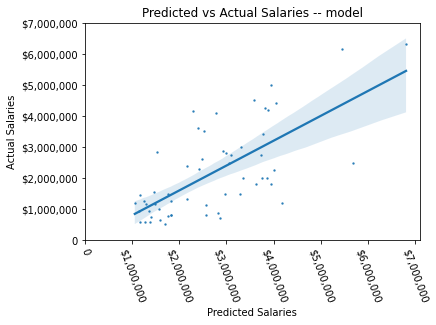

In [57]:
yticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000]
xticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000]
ytlabels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000']
xtlabels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000']

sns.regplot(y_pred, y_test,scatter_kws={'s':2})
plt.ylabel('Actual Salaries')
plt.xlabel('Predicted Salaries')
plt.xticks(ticks= xticks, labels=xtlabels, rotation=290)
plt.yticks(ticks= yticks, labels=ytlabels, rotation=0)
plt.title('Predicted vs Actual Salaries -- model')
plt.show()